In [5]:
# %matplotlib widget
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import IPython.display as ipd
from lib.utils import *

In [96]:
plt.close("all")

/Users/jdka3/anaconda3/envs/cling/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/jdka3/anaconda3/envs/cling/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jdka3/anaconda3/envs/cling/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


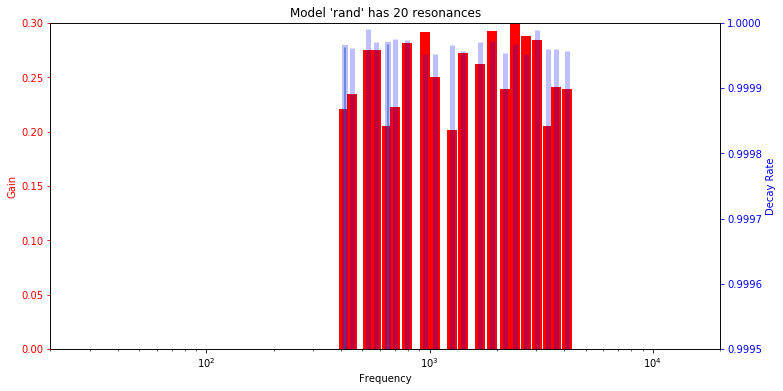

In [19]:
def modelGen (freq, gain, decay, resonators):
    res = pd.DataFrame ([],np.arange (0, resonators), ['Frequency', 'Gain', 'Decay'] ).fillna (0)
    res['Frequency'], res['Gain'], res['Decay'] = freq, gain, decay
    for i in range (0, resonators):
        res['Frequency'][i] += np.random.randint (0, 100) + ((i*i)*10+np.random.randint(0,5))
        res['Gain'][i]      += np.random.uniform (0, 0.1)
        res['Decay'][i]     += np.random.uniform (0, 2.0)
    return res

plotFreqVsGD (modelGen (400, 0.2, 0.2, 20), 'rand', 0)

In [3]:
freq  = np.logspace (1.3, 4.3, 20, endpoint=True)
decay = (np.sin (freq/100) + 1) * 25
decayExp = pd.Series(np.exp(-decay * (1/44100)))
df = pd.DataFrame ([decay, decayExp])
df

0          1          2          3          4          5   \
0  29.955125  32.077109  35.030476  38.989111  43.851768  48.551998   
1   0.999321   0.999273   0.999206   0.999116   0.999006   0.998900   

          6          7          8         9          10        11         12  \
0  49.517724  39.097069  12.671735  3.666283  48.980478  0.151734  26.248064   
1   0.998878   0.999114   0.999713  0.999917   0.998890  0.999997   0.999405   

          13         14         15        16         17         18        19  
0  12.315784  45.799664  37.424597  3.145527  45.476010  36.525006  0.015397  
1   0.999721   0.998962   0.999152  0.999929   0.998969   0.999172  1.000000

Text(0.5, 1.0, 'Model has 1000 resonances')

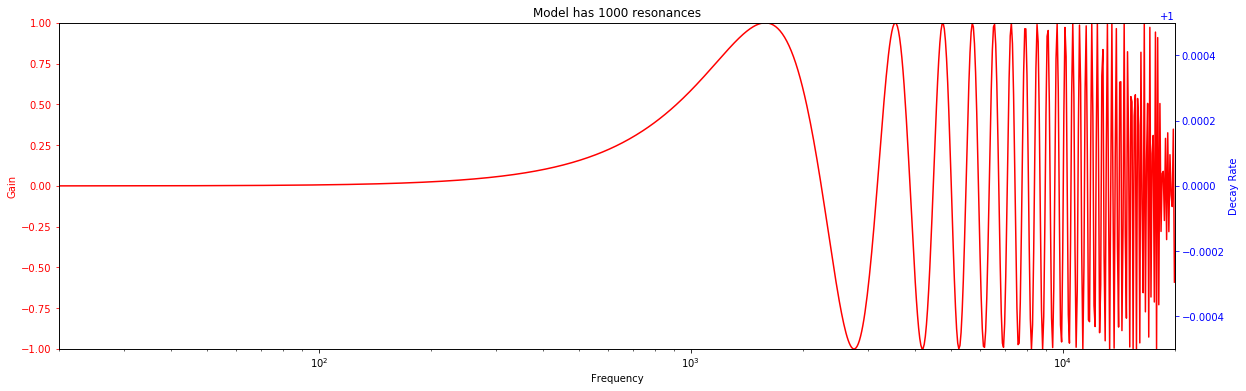

In [36]:
freq  = np.logspace (1.3, 4.3, 1000, endpoint=True)
gain  = np.sin (pow (0.25*freq, 2) / 100000)
decay = np.sin (freq/100)

decayExp = pd.Series(np.exp(-decay * (1/44100)))

fig, axGain = plt.subplots(figsize=(20,6))
# freq vs. gain
# axGain.bar  (freq, gain, linewidth=10, edgecolor=(1,0,0,1))
axGain.plot (freq, gain, '-r', alpha=1)
axGain.set_xscale ('log')
axGain.set_xticks ([10, 100, 1000, 10000])
axGain.set_xlabel ('Frequency')
axGain.set_xlim ((20,20000))
axGain.set_ylim ((-1, 1)) # 0.3
axGain.set_ylabel ('Gain', color='r')
axGain.tick_params('y', colors='r')
# freq vs. decay
axDecay = axGain.twinx()
# axDecay.bar (freq, decayExp, linewidth=5, edgecolor=(0,0,1,0.25))
# axDecay.plot (freq, decayExp, '-b', alpha=1)
axDecay.set_ylim ((0.9995, 1.0005)) # (0.9995, 1)
axDecay.set_ylabel ('Decay Rate', color='b')
axDecay.tick_params ('y', colors='b')
plt.title ('Model has ' + str(len(freq)) + ' resonances')
# axis1.get_figure().savefig('plots/freq-vs-gd_'+model_name+'.pdf')

In [69]:
fig, ax = plt.subplots( figsize=(15,5))
N = 1000
x1 = np.logspace (1.3, 4.3, N, endpoint=True)
x2 = np.logspace (1.3, 4.3, N, endpoint=True)
x3 = np.linspace (20, 20000, N, endpoint=True)
y1 = np.sin (x1/100) * 0.5 + 0.5
ax.plot (x1, y1, '-r', alpha=0.5)
# ax.plot (x2, np.sin (x3/1000)  * 0.5 + 0.5, '-b', alpha=0.5)
ax.set_xscale ('log')
ax.set_xlim([20, 20000])
ax.set_ylim([0, 1])

ax2 = ax.twinx()
ax2.plot ()

# plotFreqVsGD ()

FigureCanvasNbAgg()

[]

In [16]:
fig, ax = plt.subplots()
num = pd.DataFrame (np.logspace (1,20, 10))
ax.plot (num)
# ax.set_yscale ('log')
print(num)

FigureCanvasNbAgg()

              0
0  1.000000e+01
1  1.291550e+03
2  1.668101e+05
3  2.154435e+07
4  2.782559e+09
5  3.593814e+11
6  4.641589e+13
7  5.994843e+15
8  7.742637e+17
9  1.000000e+20
